<a href="https://colab.research.google.com/github/cserock/colab-examples/blob/main/06_BERT_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTÎ•º ÌôúÏö©Ìïú ÏòÅÌôî Î¶¨Î∑∞ Í∞êÏ†ï Î∂ÑÏÑù(Sentiment Analysis)

In [1]:
# ÌååÏù¥Ïç¨ Î≤ÑÏ†Ñ ÌôïÏù∏
!python --version

Python 3.12.12


# 0. ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

In [42]:
!pip install wordcloud
!pip install transformers

# 1. Ï†ÑÏ≤òÎ¶¨

Î®ºÏ†Ä Ïù¥ ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò®Îã§. Îç∞Ïù¥ÌÑ∞Îäî Ïù¥Ï†ÑÏóê Ïñ∏Í∏âÌïú ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïúÎã§. ÌõàÎ†®ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Îî∞Î°ú Í∞ÄÏ†∏Í∞ÑÎã§. Îç∞Ïù¥ÌÑ∞Îäî ÏÇ¨Ïö©ÏûêÏùò id, Ïú†Ï†ÄÎì§Ïùò ÏòÅÌôîÎ¶¨Î∑∞ ÎÇ¥Ïö©ÏùÑ Îã¥ÏùÄ document, ÎßàÏßÄÎßâÏúºÎ°ú Ìï¥Îãπ ÏòÅÌôîÏóê ÎßåÏ°±ÌïòÎäîÏßÄ(1) ÎòêÎäî Î∂àÎßåÏ°±ÌïòÎäîÏßÄ(0)Î•º ÎÇòÌÉÄÎÇ¥Îäî ÌÉÄÍπÉ ÌäπÏÑ±Ïù∏ labelÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ÏûàÎã§.

[ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞](https://github.com/e9t/nsmc/)

In [3]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import urllib.request

In [4]:
# ÏòÅÌôî Î¶¨Î∑∞ Ï†ïÎ≥¥ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x78c2fb56df70>)

In [5]:
# PandasÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [88]:
# Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à ÌôïÏù∏
train_data.shape, test_data.shape

((149995, 3), (49997, 3))

In [7]:
# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

In [87]:
test_data.head()

id                                           document  label
0  6270596                                                Íµ≥ „Öã      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             Î≠êÏïº Ïù¥ ÌèâÏ†êÎì§ÏùÄ.... ÎÇòÏÅòÏßÑ ÏïäÏßÄÎßå 10Ï†ê ÏßúÎ¶¨Îäî ÎçîÎçîÏö± ÏïÑÎãàÏûñÏïÑ      0
3  6825595                   ÏßÄÎ£®ÌïòÏßÄÎäî ÏïäÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû•ÏûÑ... ÎèàÏ£ºÍ≥† Î≥¥Í∏∞ÏóêÎäî....      0
4  6723715  3DÎßå ÏïÑÎãàÏóàÏñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ÏùÑÌÖêÎç∞.. Ïôú 3DÎ°ú ÎÇòÏôÄÏÑú Ï†ú Ïã¨Í∏∞Î•º Î∂àÌé∏ÌïòÍ≤å ÌïòÏ£†??      0

In [85]:
# Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎØÄÎ°ú Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
train_data = train_data.dropna(how = 'any') # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
print(train_data.isnull().values.any()) # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

False


In [86]:
# Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎØÄÎ°ú Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
test_data = test_data.dropna(how = 'any') # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Ìñâ Ï†úÍ±∞
print(test_data.isnull().values.any()) # Null Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏

False


In [89]:
train_data['document'] = train_data['document'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","", regex=True)

/tmp/ipython-input-2657199743.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##1.1 EDA

Îç∞Ïù¥ÌÑ∞Î•º ÏµúÎåÄÌïú Î∂ÑÏÑùÌïòÎäî Í≤ÉÏù¥ Î∂ÑÏÑù ÏÑ±Í≥µÏùò Ïó¥Ïá†Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, Í∞ÄÏû• Î®ºÏ†Ä Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ìï¥Î≥º Ïàò ÏûàÎäî EDAÎ•º Î™®Îëê Ìï¥Î≥∏Îã§.

In [9]:
#1. Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°Ïπò ÌôïÏù∏
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [10]:
test_data.isnull().sum()

id          0
document    3
label       0
dtype: int64

Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°ÏπòÍ∞Ä document Î∂ÄÎ∂ÑÏóêÏÑú Ï°¥Ïû¨ÌïòÍ∏∞Îäî ÌïòÏßÄÎßå, ÌÉÄÍπÉ Î†àÏù¥Î∏îÏù∏ label ÏπºÎüºÏóêÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. ÏïÑÎ¨¥ÎûòÎèÑ Î¶¨Î∑∞Î•º ÏûÖÎ†•ÌïòÍ∏∞ Í∑ÄÏ∞ÆÏïÑ ÎßåÏ°± Ïó¨Î∂ÄÎßå ÎãµÌïú ÏÇ¨ÎûåÎèÑ ÏûàÏùÑ Í≤ÉÏù¥Îã§. ÏòÅÌôîÏóê ÎåÄÌï¥ ÏÑ∏Î∂ÄÏ†ÅÏù∏ Î¶¨Î∑∞Í∞Ä ÏóÜÎäî Í≤ÉÏóê ÎåÄÌï¥ÏÑúÎäî ÏïÑÏâΩÏßÄÎßå, Í∑∏ÎüºÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÎßåÏ°±ÎèÑÏóê ÎåÄÌïú Ï†ïÎ≥¥Îäî ÌÉÄÍπÉÏóê ÏûàÏúºÎØÄÎ°ú ÏùºÎã® Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÏßÄ ÏïäÎäîÎã§.

In [11]:
# ÌÉÄÍπÉÏùò ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏ÌïòÍ∏∞
train_data["label"].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [12]:
test_data["label"].value_counts()

label
1    25173
0    24827
Name: count, dtype: int64

[Text(0.5, 1.0, 'Customer Satisfaction(Train)')]

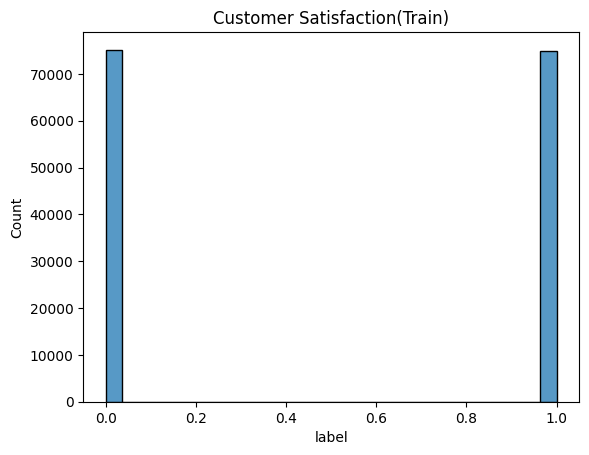

In [91]:
# ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï (class imbalance) ÌôïÏù∏ÌïòÍ∏∞
import seaborn as sns

sns.histplot(train_data["label"]).set(title="Customer Satisfaction(Train)")

ÏùºÎã® ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÅ¥ÎûòÏä§Í∞Ä Í∑†Ìòï Ïû°Ìûå Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§. ÌÅ¥ÎûòÏä§Í∞Ä Îß§Ïö∞ Î∂àÍ∑†ÌòïÌïòÏó¨ Îî∞Î°ú Îëê Î†àÏù¥Î∏îÏùÑ Í≥†Î•¥Í≤å ÏÑ∏ÌåÖÌï† ÌïÑÏöîÍ∞Ä ÏóÜÎäî Í≤ÉÏù¥Îã§.

Îã§ÏùåÏúºÎ°ú Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò Î™®Îì† Îã®Ïñ¥Î•º Î≥º Ïàò ÏûàÎäî WordCloudÎ•º ÌôúÏö©ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï¥Î≥¥Ïûê.

In [14]:
# 1. ÌïÑÏöîÌïú Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
# %matplotlib inline

In [15]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Ï§ÄÎπÑ
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x78c2ef710560>)

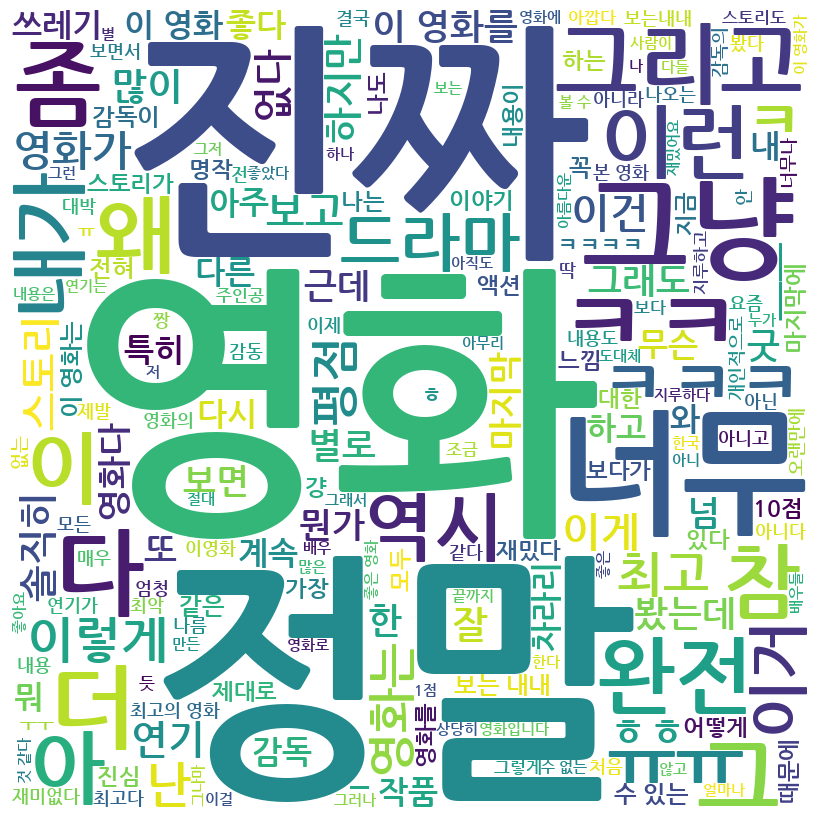

In [16]:
# 2. Stopwords Î∞è ÌäπÏàòÎ¨∏Ïûê ÌïÑÌÑ∞ÎßÅÏùÑ ÏúÑÌïú Ï§ÄÎπÑ

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. Î¨∏Ïû• Îç∞Ïù¥ÌÑ∞Î•º Îã®Ïñ¥ÌôîÌïòÍ∏∞
for val in train_data["document"]:

  # Î¨∏Ïû•ÏùÑ stringÏúºÎ°ú ÎßåÎì§Í∏∞
  val = str(val)

  # Î¨∏Ïû•ÏùÑ Ï™ºÍ∞úÍ∏∞
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800,
                font_path='AppleGothic.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

ÏúÑ WordCloudÎ•º Î≥¥Îãà "Ï†ïÎßê", "ÏòÅÌôî", "ÏßÑÏßú" Îì±Ïùò Îã®Ïñ¥Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Í≤ÉÏùÑ ÏïåÏàòÏûàÎã§. ÌïòÏßÄÎßå ÏóÑÎ∞ÄÌûà Îî∞ÏßÄÏûêÎ©¥, Ïù¥ Îã®Ïñ¥Îì§ÏùÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ìïú ÏÇ¨ÎûåÏùò Í∞êÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ Î≥¥Îã§Îäî ÌäπÏ†ïÌïú ÎåÄÏÉÅÏù¥ÎÇò, Í∑∏ ÎåÄÏÉÅÏùÑ ÌôïÎåÄÌïòÏó¨ ÌëúÌòÑÌïòÍ∏∞ ÏúÑÌïú Î∂ÄÏÇ¨Îì§Ïù¥Îã§. Ïù¥ Îã®Ïñ¥Îì§ÏùÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Í∞êÏ†ïÏùÑ Î∂ÑÏÑùÌïòÎäîÎç∞ ÏûàÏñ¥ ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü¨Ìïú Îã®Ïñ¥Îì§ÏùÄ StopwordsÎ°úÏç® ÌïÑÌÑ∞ÎßÅÌï† Ïàò ÏûàÎã§.

In [17]:
# ÌïÑÌÑ∞ÎßÅÌï† Ï∂îÍ∞ÄÏ†ÅÏù∏ stopwordsÎì§ Ï†ïÏùò

stopwords_2 = ["ÏòÅÌôî", "ÏßÑÏßú", "Ï†ïÎßê", "Ïù¥Í±∞", "Í∑∏ÎÉ•", "ÎÑàÎ¨¥", "ÏòÅÌôîÍ∞Ä", "ÏòÅÌôîÎäî",
             "Ïù¥Í±∞", "Ïù¥Í≤å", "Ïù¥Í±¥", "ÏòÅÌôîÏùò", "Ïñ¥Îñ§", "ÏïÑÏ£º", "Í≥ÑÏÜç", "ÏòÅÌôîÎã§",
             "ÏòÅÌôîÎ•º", "Í∑∏Î¶¨Í≥†"
]

##1.2 ÌÜ†ÌÅ∞Ìôî Î∞è Stopwords(Î∂àÏö©Ïñ¥) Ï†úÍ±∞

WordCloudÎ•º ÌÜµÌï¥ Î≥∏ Í≤ÉÏ≤òÎüº, Î™®Îì† Î¨∏Ïû•ÏùÑ Îã®Ïñ¥Î°ú ÌÜ†ÌÅ∞ÌôîÌïòÍ≥†, Ïù¥Ï†ÑÏóê ÏÉàÎ°≠Í≤å Ï†ïÏùòÌïú Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞ÌïúÎã§.

In [18]:
# ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏Ïû•ÌôïÏù∏
tokenized_text[0]

['ÏïÑ', 'ÎçîÎπô..', 'ÏßÑÏßú', 'ÏßúÏ¶ùÎÇòÎÑ§Ïöî', 'Î™©ÏÜåÎ¶¨']

In [19]:
len(tokenized_text)

150000

In [20]:
# ÏÉàÎ°úÏö¥ Î∂àÏö©Ïñ¥ÏôÄ Í∏∞Ï°¥ Î∂àÏö©Ïñ¥ ÌïÑÌÑ∞ÎßÅÌïòÍ∏∞

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)

  return tokenized_filtered

In [21]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [22]:
# ÌïÑÌÑ∞ÎßÅ ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
tokenized_filtered[0:10]

['ÏïÑ',
 'ÎçîÎπô..',
 'ÏßúÏ¶ùÎÇòÎÑ§Ïöî',
 'Î™©ÏÜåÎ¶¨',
 'Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥†',
 'Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞®',
 'Í∞ÄÎ≥çÏßÄ',
 'ÏïäÍµ¨ÎÇò',
 'ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§',
 'ÍµêÎèÑÏÜå']

In [23]:
len(tokenized_filtered)

1083270

In [24]:
# Í∞Å Îã®Ïñ¥Í∞Ä ÏñºÎßàÎÇò ÎÇòÏôîÎäîÏßÄ Ïπ¥Ïö¥Ìä∏Ìï¥Î≥¥Í∏∞

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # ÎßéÏù¥ ÎÇòÏò® ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))

  return sorted_dict

In [25]:
tokenized_dict = word_count(tokenized_filtered)

In [26]:
# Í∞ÄÏû• ÏÉÅÏúÑ 20Í∞úÏùò Îã®Ïñ¥ Î≥¥Í∏∞
def top_20(tokenized_dict):
  top_20_words = list(tokenized_dict.items())[:20]
  return top_20_words

top_20(tokenized_dict)

[('Ïù¥', 5059),
 ('ÏòÅÌôî.', 3598),
 ('Ïôú', 3285),
 ('Îçî', 3260),
 ('Ïù¥Îü∞', 3249),
 ('Ïàò', 2945),
 ('Ïûò', 2644),
 ('Îã§', 2615),
 ('Î≥¥Í≥†', 2557),
 ('Ï¢Ä', 2449),
 ('Í∑∏', 2421),
 ('Î≥∏', 2298),
 ('ÏµúÍ≥†Ïùò', 2219),
 ('„Öã„Öã', 2019),
 ('ÎÇ¥Í∞Ä', 2000),
 ('ÏóÜÎäî', 1957),
 ('Ïù¥Î†áÍ≤å', 1828),
 ('ÏôÑÏ†Ñ', 1780),
 ('ÌèâÏ†ê', 1760),
 ('Î¥§ÎäîÎç∞', 1746)]

ÌÅ¨Í≤å ÏùòÎØ∏Í∞Ä ÏóÜÎäî Îã®Ïñ¥Îì§Ïù¥ ÏïÑÏßÅÎèÑ ÎÇ®ÏïÑÏûàÎã§. Ï°∞Í∏à Îçî Î∂àÏö©Ïñ¥Îì§ÏùÑ ÌïÑÌÑ∞ÎßÅÌï¥Î≥¥Ïûê.

In [27]:
stopwords_2.extend(["Ïù¥", "Ïù¥Î†áÍ≤å", "Îçî", "Ïàò", "Îã§", "Í∑∏", "ÎÇ¥Í∞Ä", "Ïù¥Î†áÍ≤å",
               "ÏôÑÏ†Ñ", "Î¥§ÎäîÎç∞", "ÏòÅÌôî.", "ÌèâÏ†ê", "ÌèâÏ†êÏù¥", "Ïôú", "Ïù¥Îü∞", "Î≥∏",
               "Î≥¥Í≥†", "Ïûò"
])

In [28]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

1038630

In [29]:
tokenized_dict = word_count(tokenized_filtered)

In [30]:
# Í∞ÄÏû• ÏÉÅÏúÑ 20Í∞úÏùò Îã®Ïñ¥ Î≥¥Í∏∞
top_20(tokenized_dict)

[('Ï¢Ä', 2449),
 ('ÏµúÍ≥†Ïùò', 2219),
 ('„Öã„Öã', 2019),
 ('ÏóÜÎäî', 1957),
 ('ÏûàÎäî', 1739),
 ('Ï¢ãÏùÄ', 1726),
 ('Î≥¥Îäî', 1600),
 ('ÎÇ¥', 1595),
 ('Îã§Ïãú', 1583),
 ('Ï∞∏', 1508),
 ('ÎßéÏù¥', 1478),
 ('Ïó≠Ïãú', 1466),
 ('ÎÇú', 1405),
 ('Ïó∞Í∏∞', 1365),
 ('Ïû¨Î∞åÍ≤å', 1343),
 ('Ìïú', 1323),
 ('Ïì∞Î†àÍ∏∞', 1295),
 ('Í≤É', 1277),
 ('ÌïòÎäî', 1236),
 ('Îòê', 1231)]

ÎìúÎîîÏñ¥ Í∞êÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Îã®Ïñ¥Îì§Ïù¥ Ï¢Ä Î≥¥Ïù¥Í∏∞ ÏãúÏûëÌñàÎã§. "Ï¢Ä"Ïù¥ÎùºÎäî ÎßêÏùÄ, Ïñ¥ÎñªÍ≤å Î≥¥Î©¥ ÏßÅÏ†ëÏ†ÅÏù∏ Í∞êÏ†ïÏùÑ ÎìúÎü¨ÎÇ∏Îã§Í≥† Ìï† ÏàòÎäî ÏóÜÏßÄÎßå, ÏùºÎ∞òÏ†ÅÏúºÎ°ú "Ï¢Ä Í∑∏Î†áÎã§.", "Ï¢Ä Î≥ÑÎ°úÎã§." ÎùºÎäî ÏãùÏúºÎ°ú Î∂ÄÏ†ïÏ†ÅÏù∏ ÎâòÏïôÏä§Î°ú ÎßéÏù¥ Ïì∞Ïù∏Îã§. "Ï¢Ä Ï¢ãÎã§.", "Ï¢Ä Í¥úÏ∞ÆÎã§."ÎùºÎäî ÎßêÏùÑÏì∞Í∏∞ÎèÑ ÌïòÏßÄÎßå, ÏùºÏÉÅÏóêÏÑú ÏûêÏó∞Ïä§ÎüΩÎã§Í≥† ÎäêÎÇÑÏ†ïÎèÑÎ°ú Í∏çÏ†ïÏ†ÅÏù∏ Ïñ¥Ìà¨Î°ú Ïì∞Ïù¥ÏßÄÎäî ÏïäÎäî Ìé∏Ïù¥Îã§. Í∑∏ÎßåÌÅº Ïù¥ Îã®Ïñ¥Îäî Ïñ¥Îäê Ï†ïÎèÑ Î∂ÄÏ†ïÏ†ÅÏù∏ Í∞êÏ†ïÏùÑ ÎÇòÌÉÄÎÇº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§. ÌïòÏßÄÎßå, "ÏµúÍ≥†Ïùò"ÎùºÎäî ÍµâÏû•Ìûà Í∏çÏ†ïÏ†ÅÏù∏ Í∞êÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Îã®Ïñ¥Í∞Ä Îí§Îî∞Î•∏ Í≤ÉÏúºÎ°úÎ≥¥ÏïÑ, ÏûêÏã†Ïù¥ Î≥∏ Ïª®ÌÖêÏ∏†Î•º Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÏÉùÍ∞ÅÌïú ÏÇ¨ÎûåÎì§ Î™ªÏßÄ ÏïäÍ≤å, Í∏çÏ†ïÏ†ÅÏúºÎ°ú Î≥∏ ÏÇ¨ÎûåÎì§ÎèÑ ÏÉÅÎãπÌûà ÎßéÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§ÄÎã§. Îí§ Îî∞Î•¥Îäî "„Öã„Öã"ÎùºÎäî ÏõÉÏùåÏùò ÏùòÏÑ±Ïñ¥Îäî, Ï£ºÎ°ú Î¨¥Ïñ∏Í∞ÄÍ∞Ä Ïû¨ÎØ∏ÏûàÍ±∞ÎÇò Ìù•ÎØ∏Î°úÏö∏ Îïå ÎßéÏù¥ Ïì¥Îã§. Ïù¥Îü¨Ìïú Ïö©Ïñ¥Ïùò ÎπàÎèÑÍ∞Ä ÎÜíÏïòÎã§Îäî ÏÇ¨Ïã§ Ïó≠Ïãú, ÏûêÏã†Ïù¥ ÏãúÏ≤≠Ìïú ÏΩòÌÖêÏ∏†Î•º Ï¶êÍ≤ÅÍ≤å ÌèâÍ∞ÄÌïúÏÇ¨ÎûåÏù¥ ÎßéÏïòÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§ÄÎã§. Í∑∏ Ïù¥ÌõÑÏóê ÎÇòÏò§Îäî "Ï¢ãÏùÄ", "Ïû¨Î∞åÍ≤å"ÎùºÎäî Îã®Ïñ¥Îì§Ïù¥ Îí§Îî∞ÎûêÍ≥†, ÏÉÅÎãπÌûà Î∂ÄÏ†ïÏ†ÅÏù∏ Í∞êÏ†ïÏùÑ ÎìúÎü¨ÎÇ¥Îäî "Ïì∞Î†àÍ∏∞"ÎùºÎäî ÌëúÌòÑÎèÑ ÏÉÅÎãπÌïú ÎπàÎèÑÎ°ú ÎÇòÏò® Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏûêÏã†Ïù¥ Î≥∏ ÏΩòÌÖêÏ∏†Î•º Í∏çÏ†ïÏ†ÅÏúºÎ°ú Î≥∏ ÏÇ¨ÎûåÎì§ Î™ªÏßÄÏïäÍ≤å, Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïú ÏÇ¨ÎûåÎì§ÎèÑ ÏÉÅÎãπÌûà ÎßéÏïòÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïó¨Í∏∞ÏÑú Ï¢Ä Îçî Ï†ÑÏ≤òÎ¶¨Î•º Ìï¥Î≥∏Îã§. Ïù¥Î≤àÏóêÎäî ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Í∞êÏ†ïÏù¥ ÎìúÎü¨ÎÇòÎäî Îã®Ïñ¥Î•º Ï∞æÍ∏∞ ÏúÑÌï¥ ÏßÅÏ†ë Í∞êÏ†ïÏù¥ ÎìúÎü¨ÎÇòÎäî Î†àÎ≤®ÍπåÏßÄ Í∞ÄÎ≥∏Îã§. Í∑∏ ÌõÑÏóê, Î™áÍ∞ÄÏßÄ Îã®Ïñ¥Îì§ÏùÑ ÌäπÏ†ïÌïú Í∞êÏ†ïÏúºÎ°ú ÎåÄÏ≤¥ÌïòÏó¨ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†Îã§.

In [31]:
stopwords_2.extend(["Î≥¥Îäî", "ÎÇ¥", "Îã§Ïãú", "ÎÇú", "Ïó∞Í∏∞", "Ìïú", "Í≤É", "ÌïòÎäî", "Îòê",
                    "Ïó≠Ïãú", "Ï¢Ä", "Ï∞∏", "ÎßéÏù¥", "ÏóÜÎäî", "ÏûàÎäî"
])

In [32]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

1015418

In [33]:
tokenized_dict = word_count(tokenized_filtered)

In [34]:
top_20(tokenized_dict)

[('ÏµúÍ≥†Ïùò', 2219),
 ('„Öã„Öã', 2019),
 ('Ï¢ãÏùÄ', 1726),
 ('Ïû¨Î∞åÍ≤å', 1343),
 ('Ïì∞Î†àÍ∏∞', 1295),
 ('ÏïÑ', 1204),
 ('ÎìúÎùºÎßà', 1186),
 ('Íº≠', 1181),
 ('Í∞ÄÏû•', 1178),
 ('Î≥¥Î©¥', 1176),
 ('„Öã„Öã„Öã', 1108),
 ('ÎßàÏßÄÎßâ', 1070),
 ('Ïä§ÌÜ†Î¶¨', 1020),
 ('Î¨¥Ïä®', 999),
 ('„Öã', 989),
 ('ÏóÜÍ≥†', 981),
 ('.', 981),
 ('Î≥º', 959),
 ('„Ö†„Ö†', 958),
 ('Í∞ôÏùÄ', 956)]

## 1.3 ÌÇ§ÏõåÎìú Î∂ÑÏÑùÌïòÍ∏∞

In [35]:
# Í∞êÏ†ïÏù¥ ÎìúÎü¨ÎÇú Îã®Ïñ¥Îì§ÏùÑ Î¨∂Ïñ¥Î≥¥Í∏∞

emotion_dict = {"ÏµúÍ≥†Ïùò": "Í∑πÏ∞¨", "„Öã„Öã": "ÏõÉÏùå", "Ï¢ãÏùÄ": "Í∏∞ÏÅ®", "Ïû¨Î∞åÍ≤å": "Ìù•ÎØ∏",
                "Ïì∞Î†àÍ∏∞": "ÌòêÏò§", "„Öã„Öã„Öã": "ÏõÉÏùå", "„Öã": "Î¨¥Ïã¨", "„Ö†„Ö†": "Ïä¨Ìîî"
}

In [36]:
from collections import defaultdict, OrderedDict

emotions_dict = defaultdict(int)

emotions_list = []

for k, v in tokenized_dict.items():
  for key, value in emotion_dict.items():
    if k == key:
      emotions_list.append((value, v))

for k, v in emotions_list:
  if k in emotions_dict:
    emotions_dict[k] += v
  else:
    emotions_dict[k] = v

emotions_dict = OrderedDict(sorted(emotions_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

emotions_dict

OrderedDict([('ÏõÉÏùå', 3127),
             ('Í∑πÏ∞¨', 2219),
             ('Í∏∞ÏÅ®', 1726),
             ('Ìù•ÎØ∏', 1343),
             ('ÌòêÏò§', 1295),
             ('Î¨¥Ïã¨', 989),
             ('Ïä¨Ìîî', 958)])

In [37]:
# PlotlyÎ°ú ÏãúÍ∞ÅÌôî

# Pie Chart
import plotly.express as px

emotions = pd.Series(emotions_dict)

fig = px.pie(emotions, values=emotions, names=emotions.index, title="Í∞ÄÏû• ÎëêÎìúÎü¨ÏßÄÍ≤å ÎÇòÌÉÄÎÇú Í∞êÏ†ï", hover_data=[emotions], labels=emotions.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [38]:
# Bar chart
fig = px.bar(emotions, x=emotions.index, y=emotions, title="Í∞ÄÏû• ÎëêÎìúÎü¨ÏßÄÍ≤å ÎÇòÌÉÄÎÇú Í∞êÏ†ï")
fig.show()

# 2. Î™®Îç∏ÎßÅ

## 2.1 Î™®Îç∏ÎßÅÏùÑ ÏúÑÌïú Ï§ÄÎπÑ

Ïù¥Ï†úÎäî "ÎåÄÏ≤¥Î°ú ÏôìÏ±†Ïùò Í≥†Í∞ùÎì§ÏùÄ ÏΩòÌÖêÏ∏†Ïóê ÎßåÏ°±ÌïúÎã§."ÎùºÎäî Í∞ÄÏÑ§ÏùÑ ÏãúÌóòÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îç∏ÎßÅÏùÑ Ï§ÄÎπÑÌï¥ÏïºÌïúÎã§. BERTÎ™®Îç∏Ïóê ÎßûÍ≤å Ïù∏ÏΩîÎî© Î∞è ÌëúÏ§ÄÌôî ÏûëÏóÖÏù¥ ÌïÑÏöîÌïòÎã§. Ïù¥ Î™®Îç∏ÏùÄ Transformer Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïúÎã§.

Îã§ÏùåÏúºÎ°ú Ïù¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ PyTorchÍ∞Ä ÌïÑÏöîÌïòÎã§. ÎòêÌïú, Transformer Î™®ÎìàÏóêÏÑú BertÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú Î©îÏÜåÎìúÎì§ÏùÑ Î∂àÎü¨ÏôÄÏïºÌïúÎã§.

In [44]:
# Bert ÏÇ¨Ïö©Ïóê ÌïÑÏöîÌïú Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, Adafactor, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

BertÎ•º ÏúÑÌï¥ Ï°∞Í∏à Îçî ÌååÏõåÌíÄÌïú GPUÎ•º ÏÇ¨Ïö©Ìï¥ÏïºÌïúÎã§. GPUÍ∞Ä ÏÇ¨Ïö©ÎêòÎäîÏßÄ ÌôïÏù∏ÌïúÎã§.

In [45]:
import os

n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
    print(torch.cuda.get_device_name(i))

1
Tesla T4


BERTÎäî Î¨∏Ïû•Ïùò ÏïûÏóê [CLS]Î•º Î∂ôÏù¥Í≥†, ÎÅùÏóêÎäî [SEP]ÏùÑ Î∂ôÏó¨ Ï≤òÎ¶¨Î•º Ìï¥ Ï£ºÏñ¥ÏïºÌïúÎã§. Í∑∏Îü¨ÎØÄÎ°ú Î∞òÎ≥µÎ¨∏ Îì±ÏùÑ ÌôúÏö©ÌïòÏó¨ Ï≤òÎ¶¨Ìï¥ Ï£ºÏñ¥ÏïºÌïúÎã§.

In [46]:
# BERTÏóê ÎßûÎäî Tag Îã¨ÏïÑÏ£ºÍ∏∞
bert_text = []

for i in train_data['document']:
  bert = ["[CLS] " + str(i) + " [SEP]"]
  bert_text.append(bert)

bert_text[:5]

[['[CLS] ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨ [SEP]'],
 ['[CLS] Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò [SEP]'],
 ['[CLS] ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§ [SEP]'],
 ['[CLS] ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï [SEP]'],
 ['[CLS] ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ÎçòÏä§Ìä∏Í∞Ä ÎÑàÎ¨¥ÎÇòÎèÑ Ïù¥ÎªêÎ≥¥ÏòÄÎã§ [SEP]']]

In [47]:
test_text = []

for i in test_data['document']:
  bert = ["[CLS] " + str(i) + " [SEP]"]
  test_text.append(bert)

test_text[:5]

[['[CLS] Íµ≥ „Öã [SEP]'],
 ['[CLS] GDNTOPCLASSINTHECLUB [SEP]'],
 ['[CLS] Î≠êÏïº Ïù¥ ÌèâÏ†êÎì§ÏùÄ.... ÎÇòÏÅòÏßÑ ÏïäÏßÄÎßå 10Ï†ê ÏßúÎ¶¨Îäî ÎçîÎçîÏö± ÏïÑÎãàÏûñÏïÑ [SEP]'],
 ['[CLS] ÏßÄÎ£®ÌïòÏßÄÎäî ÏïäÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû•ÏûÑ... ÎèàÏ£ºÍ≥† Î≥¥Í∏∞ÏóêÎäî.... [SEP]'],
 ['[CLS] 3DÎßå ÏïÑÎãàÏóàÏñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ÏùÑÌÖêÎç∞.. Ïôú 3DÎ°ú ÎÇòÏôÄÏÑú Ï†ú Ïã¨Í∏∞Î•º Î∂àÌé∏ÌïòÍ≤å ÌïòÏ£†?? [SEP]']]

Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Ïù¥ÎØ∏ ÌÜ†ÌÅ∞ÌôîÎêú Í≤ÉÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ï¢ãÍ≤†ÏßÄÎßå, ÏúÑÏôÄ Í∞ôÏù¥ CLS Î∞è SEP ÌÉúÍ∑∏Î•º Îã¨ÏïÑÏ£ºÏñ¥Ïïº ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, ÏµúÏ¥àÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌñàÎã§. Ïù¥Î≤àÏóêÎäî Bert multilingual Î™®Îç∏Ïóê ÏûàÎäî tokenizerÎ•º ÌôúÏö©ÌïòÏó¨ ÌÜ†ÌÅ∞ÌôîÌïúÎã§.

In [48]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_data = []
for i in bert_text:
  for j in i:
    tokens = tokenizer.tokenize(j)
    tokenized_data.append(tokens)

print(tokenized_data[0:10])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

[['[CLS]', 'ÏïÑ', 'Îçî', '##Îπô', '.', '.', 'ÏßÑ', '##Ïßú', 'Ïßú', '##Ï¶ù', '##ÎÇò', '##ÎÑ§', '##Ïöî', 'Î™©', '##ÏÜå', '##Î¶¨', '[SEP]'], ['[CLS]', '[UNK]', '.', '.', '.', 'Ìè¨', '##Ïä§ÌÑ∞', '##Î≥¥', '##Í≥†', 'Ï¥à', '##Îî©', '##ÏòÅ', '##Ìôî', '##Ï§Ñ', '.', '.', '.', '.', 'Ïò§', '##Î≤Ñ', '##Ïó∞', '##Í∏∞', '##Ï°∞', '##Ï∞®', 'Í∞Ä', '##Î≥ç', '##ÏßÄ', 'Ïïä', '##Íµ¨', '##ÎÇò', '[SEP]'], ['[CLS]', '[UNK]', '[SEP]'], ['[CLS]', 'Íµê', '##ÎèÑ', '##ÏÜå', 'Ïù¥ÏïºÍ∏∞', '##Íµ¨', '##Î®º', '.', '.', 'ÏÜî', '##ÏßÅ', '##Ìûà', 'Ïû¨', '##ÎØ∏', '##Îäî', 'ÏóÜÎã§', '.', '.', 'Ìèâ', '##Ï†ê', 'Ï°∞', '##Ï†ï', '[SEP]'], ['[CLS]', 'ÏÇ¨', '##Ïù¥', '##Î™¨', '##Ìéò', '##Í∑∏', '##Ïùò', 'Ïùµ', '##ÏÇ¥', '##Ïä§', '##Îü∞', 'Ïó∞', '##Í∏∞Í∞Ä', 'Îèã', '##Î≥¥', '##ÏòÄÎçò', 'ÏòÅÌôî', '!', 'Ïä§', '##Ìåå', '##Ïù¥', '##Îçî', '##Îß®', '##ÏóêÏÑú', 'Îäô', '##Ïñ¥', '##Î≥¥', '##Ïù¥', '##Í∏∞', '##Îßå', 'Ìñà', '##Îçò', 'Ïª§', '##Ïä§', '##Ìã¥', 'Îçò', '##Ïä§Ìä∏', '##Í∞Ä', 'ÎÑà', '##Î¨¥', '##ÎÇò', '##ÎèÑ', 'Ïù¥', '##Îªê', '##Î≥¥', '##ÏòÄ

In [49]:
tokenized_test_data = []
for i in test_text:
  for j in i:
    tokens = tokenizer.tokenize(j)
    tokenized_test_data.append(tokens)

print(tokenized_test_data[0:5])

[['[CLS]', 'Íµ≥', '[UNK]', '[SEP]'], ['[CLS]', 'G', '##D', '##NT', '##OP', '##CL', '##AS', '##SI', '##NT', '##H', '##EC', '##L', '##UB', '[SEP]'], ['[CLS]', 'Î≠ê', '##Ïïº', 'Ïù¥', 'Ìèâ', '##Ï†ê', '##Îì§ÏùÄ', '.', '.', '.', '.', 'ÎÇò', '##ÏÅò', '##ÏßÑ', 'Ïïä', '##ÏßÄÎßå', '10', '##Ï†ê', 'Ïßú', '##Î¶¨Îäî', 'Îçî', '##Îçî', '##Ïö±', '[UNK]', '[SEP]'], ['[CLS]', 'ÏßÄ', '##Î£®', '##ÌïòÏßÄ', '##Îäî', 'ÏïäÏùÄ', '##Îç∞', 'ÏôÑ', '##Ï†Ñ', 'Îßâ', '##Ïû•', '##ÏûÑ', '.', '.', '.', 'Îèà', '##Ï£º', '##Í≥†', 'Î≥¥', '##Í∏∞Ïóê', '##Îäî', '.', '.', '.', '.', '[SEP]'], ['[CLS]', '3D', '##Îßå', 'ÏïÑ', '##Îãà', '##Ïóà', '##Ïñ¥', '##ÎèÑ', 'Î≥Ñ', 'Îã§', '##ÏÑØ', 'Í∞ú', 'Ï§¨', '##ÏùÑ', '##ÌÖê', '##Îç∞', '.', '.', 'Ïôú', '3D', '##Î°ú', 'ÎÇò', '##ÏôÄ', '##ÏÑú', 'Ï†ú', 'Ïã¨', '##Í∏∞Î•º', 'Î∂à', '##Ìé∏', '##ÌïòÍ≤å', 'Ìïò', '##Ï£†', '?', '?', '[SEP]']]


Ïù¥Ï†Ñ Îî•Îü¨Îãù ÏàòÏóÖÏóêÏÑú paddingÏù¥ Îß§Ïö∞ Ï§ëÏöîÌïòÎã§Í≥† Î∞∞Ïõ†Îã§. Í∞ÄÏû•ÏûêÎ¶¨Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ 1Î≤àÎßå ÏÇ¨Ïö©ÎêòÎäî Í≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïóê 0Ïùò ÌÖåÎëêÎ¶¨Î•º ÎëêÎ•¥Îäî Í≤ÉÏù¥Îã§. Ïù¥ ÏûëÏóÖÏù¥ BERT Î™®Îç∏ÏùÑ ÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ÏÑúÎèÑ ÌïÑÏöîÌïòÎã§.

In [50]:
# padding
input_ids = []
for i in tokenized_data:
  ids = tokenizer.convert_tokens_to_ids(i)
  input_ids.append(ids)

print(input_ids[0])

[101, 9519, 9074, 119005, 119, 119, 9708, 119235, 9715, 119230, 16439, 77884, 48549, 9284, 22333, 12692, 102]


In [51]:
input_ids_test = []
for i in tokenized_test_data:
  ids = tokenizer.convert_tokens_to_ids(i)
  input_ids_test.append(ids)

print(input_ids_test[0])

[101, 8911, 100, 102]


In [52]:
max_len = 128
input_ids = pad_sequences(input_ids, maxlen=max_len, dtype='long', truncating='post', padding='post')
input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [53]:
input_ids_test = pad_sequences(input_ids_test, maxlen=max_len, dtype='long', truncating='post', padding='post')
input_ids_test[0]

array([ 101, 8911,  100,  102,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

Îã§ÏùåÏúºÎ°ú MaskingÏùÑ Ï§ÄÎπÑÌïúÎã§.

In [54]:
attention_masks = []

for ids in input_ids:
  ids_mask = []
  for id in ids:
      masked = float(id>0)
      ids_mask.append(masked)
  attention_masks.append(ids_mask)

print(attention_masks[0])
print(len(attention_masks[0]))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
128


In [55]:
attention_masks_test = []

for ids in input_ids_test:
  ids_mask = []
  for id in ids:
      masked = float(id>0)
      ids_mask.append(masked)
  attention_masks_test.append(ids_mask)

print(attention_masks_test[0])
print(len(attention_masks_test[0]))

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
128


Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ÏÑúÎäî train Îç∞Ïù¥ÌÑ∞ÏôÄ validation Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï¥ÏïºÌïúÎã§. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ Î∂ÑÎ¶¨ÎêòÏñ¥ÏûàÎã§. Îã§Îßå Ïù¥ÌõÑ Î™®Îç∏Ïùò fine-tuningÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏôÄ, Ïù¥ÌõÑ Î™®Îç∏ÎßÅÏùÑ ÏúÑÌï¥ tensorÎ°ú Î≥ÄÌôòÌï† Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï¥ Ï£ºÏñ¥ÏïºÌïúÎã§.

In [56]:
X_train, X_val, y_train, y_val = train_test_split(
    input_ids, train_data['label'].values, random_state=42, test_size=0.2)

train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       random_state=42,
                                                       test_size=0.2)

In [57]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((120000, 128), (30000, 128), (120000,), (30000,))

In [58]:
# Fine-tuningÍ≥º TensorÎ°ú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨
X_train_tune = X_train
y_train_tune = y_train
X_val_tune = X_val
y_val_tune = y_val

In [59]:
X_test_tensor = input_ids_test
y_test_tensor = test_data["label"].values
test_masks = attention_masks_test

Îã§ÏùåÏúºÎ°ú input_ids, ÌÉÄÍπÉ ÎùºÎ≤®, maskingÏùÑ PyTorchÎ°ú Î≥ÄÌôòÌï¥ÏïºÌïúÎã§.

In [60]:
# PyTorchÎ°ú Î≥ÄÌôò

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
train_masks = torch.tensor(train_masks)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)
validation_masks = torch.tensor(validation_masks)

In [61]:
X_test_tensor = torch.tensor(X_test_tensor)
y_test_tensor = torch.tensor(y_test_tensor)
test_masks = torch.tensor(attention_masks_test)

Ïù¥Î≤àÏóêÎäî Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶àÎ•º ÏßÄÏ†ïÌïúÎã§. Ï£ºÎ°ú ÌÅ∞ ÏÇ¨Ïù¥Ï¶àÎ•º ÏÑ§Ï†ïÌï¥Î≥¥Í≥†, VRAM ÏóêÎü¨ Î©îÏãúÏßÄÍ∞Ä ÎÇúÎã§Î©¥, Îçî ÏûëÏùÄ ÏÇ¨Ïù¥Ï¶àÎ°ú Ï§ÑÏó¨ÎÇòÍ∞ÑÎã§. 8Ïùò Î∞∞ÏàòÎ°ú ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏù¥Îã§. Ìïú Î∏îÎ°úÍ∑∏Î•º Ï∞∏Ï°∞[2]Ìï¥Î≥¥Îãà, 32Ïùº Îïå Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•Ïù¥ ÎÇòÏôîÎã§Í≥† ÌïúÎã§. Í∑∏ÎûòÏÑú Ïù¥Î•º batch_sizeÏùò Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌñàÎã§.

In [62]:
batch_size = 32

train = TensorDataset(X_train_tensor, train_masks, y_train_tensor)
train_sampler = RandomSampler(train)

val = TensorDataset(X_val_tensor, validation_masks, y_val_tensor)
val_sampler = SequentialSampler(val)


test = TensorDataset(X_test_tensor, test_masks, y_test_tensor)
test_sampler = RandomSampler(test)

train_dataloader = DataLoader(train, sampler=train_sampler, batch_size=batch_size)
val_dataloader = DataLoader(val, sampler=val_sampler, batch_size=batch_size)
test_dataloader = DataLoader(test, sampler=test_sampler, batch_size=batch_size)

Îã§ÏùåÏúºÎ°ú GPUÍ∞Ä ÏÇ¨Ïö©Í∞ÄÎä•ÌïúÏßÄÎ•º Ï≤¥ÌÅ¨Ìï¥ÏïºÌïúÎã§. GPUÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å ÏÑ§Ï†ïÌï¥Ï§ÄÎã§. PyTorchÎäî GPUÎ•º ÎèåÎ¶¥ Ïàò ÏûàÎäî CUDA ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏßÄÏõêÌïòÎäîÎç∞, PyTorchÎ•º ÌÜµÌï¥ CUDAÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÎîîÎ∞îÏù¥Ïä§Î•º Ï¥àÍ∏∞ÌôîÌïúÎã§.

In [83]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


##2.2 Î™®Îç∏ Fine-Tuning

BERTÎ™®Îç∏ÏùÄ Fine-TuningÏùÑ ÌÜµÌï¥ ÏõêÌïòÎäî Î™©Ï†ÅÏóê ÎßûÍ≤å ÏµúÏ†ÅÌôî ÏãúÌÇ¨ ÏàòÎèÑ ÏûàÎã§. Ïù¥Î≤à Îã®Í≥ÑÏóêÏÑúÎäî Î™®Îç∏Ïùò ÏµúÏ¢Ö ÌïôÏäµ Ï†Ñ, Î™®Îç∏ÏùÑ Fine-TuningÌïòÏó¨ ÏÑ±Îä•ÏùÑ Ïò¨Î¶¨Í≥†Ïûê ÌïúÎã§.

ÏùºÎã® BERT Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïúÎã§. TransformersÏùò BertForSequenceClassification Î™®ÎìàÏùÑ ÌôúÏö©ÌïúÎã§. ÌÉÄÍπÉÏùÄ 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, ÎùºÎ≤®Ïùò ÏàòÎäî 2Í∞Ä Îê† Í≤ÉÏù¥Îã§. ÏÇ¨Ïö©Ìï† BERTÎ™®ÎìàÏùò Ïù¥Î¶ÑÏùÄ "bert-case-multilingual-cased"ÎùºÎäî Í≤ÉÏúºÎ°ú ÏòÅÏñ¥ Ïù¥Ïô∏Ïùò Ïñ∏Ïñ¥ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäîÎç∞ Ïú†Ïö©ÌïòÎã§.

In [64]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

Îã§ÏùåÏúºÎ°ú ÌïÑÏöîÌïú ÌååÎùºÎØ∏ÌÑ∞Îßå Fine-TuningÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎèÑÎ°ù requires_gradÎ•º FalseÎ°ú ÏÑ§Ï†ïÌïúÎã§.

In [65]:
for param in model.base_model.parameters():
    param.requires_grad = False

Fine TuningÏùÑ ÏúÑÌï¥ÏÑúÎäî TransformerÎ™®ÎìàÏù¥ Ï†úÍ≥µÌïòÎäî Trainer Î∞è TrainingArgumentsÎùºÎäî Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï¥ÏïºÌïòÎäîÎç∞, Ïù¥Î•º ÏúÑÌï¥ÏÑúÎäî Ïù¥ Î©îÏÜåÎìúÏóê ÏûÖÎßûÏóê ÎßûÎäî ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Ïñ¥Ï£ºÏñ¥ÏïºÌïúÎã§. Ïù¥Ï†ÑÏóê ÌôúÏö©Ìïú train_test_splitÎ•º Ïù¥Ïö©Ìï¥, Îç∞Ïù¥ÌÑ∞Î•º Îëê Î©îÏÜåÎìúÍ∞Ä ÏõêÌïòÎäî ÌòïÌÉúÎ°ú Îã§Ïãú Î∂ÑÎ¶¨ÌïúÎã§. Ï£ºÏùòÌï† Í≤ÉÏùÄ, Ïù¥ Î©îÏÜåÎìúÎì§ÏùÄ Î¶¨Ïä§Ìä∏Ïùò ÌòïÌÉúÎ°úÎßå Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑÎì§Ïù¥Í≥†, Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Îäî Î™®Îëê stringÏù¥Ïñ¥ÏïºÌïúÎã§Îäî Í≤ÉÏù¥Îã§. ÎùºÎ≤®ÏùÄ Í∂ÅÍ∑πÏ†ÅÏúºÎ°ú ÏòàÏ∏°Ìï† ÌÉÄÍπÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê stringÏúºÎ°ú Î≥ÄÌôòÏãúÌÇ§ÏßÄ ÏïäÎäîÎã§. Ïù¥Ï†ÑÏóê ÌÜ†ÌÅ∞Ìôî Îã®Í≥ÑÏóêÏÑú ÎÇòÎàà Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Ï∂îÌõÑ Ïã§Ï†ú ÌïôÏäµÏóê ÌôúÏö©Ìï† Í≤ÉÏù¥Îã§.

In [66]:
from sklearn.model_selection import train_test_split
train_queries, val_queries, train_docs, val_docs, train_labels, val_labels = train_test_split(
    train_data["id"].apply(str).tolist(),
    train_data["document"].apply(str).tolist(),
    train_data["label"].tolist(),
    test_size=.2
)

Îã§ÏùåÏúºÎ°ú ÎÇòÎààÎç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌï¥ÏïºÌïúÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú BertTokenizerFastÎùºÎäî transformers Î™®ÎìàÏùò Í∞ùÏ≤¥Î•º ÌôúÏö©Ìï† Ïàò ÏûàÎã§.

In [67]:
from transformers import BertTokenizerFast

model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

train_encodings = tokenizer(train_queries, train_docs, truncation=True, padding='max_length', max_length=max_len)
val_encodings = tokenizer(val_queries, val_docs, truncation=True, padding='max_length', max_length=max_len)

ÎßàÏßÄÎßâÏúºÎ°ú Fine-TuningÏùÑ Ïã§ÏãúÌïòÍ∏∞ Ï†Ñ, ÌÜ†ÌÅ∞ÌôîÌïú Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Ïù∏ÏΩîÎî©ÌïúÎã§.

In [68]:
import torch

class Cord19Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Cord19Dataset(train_encodings, train_labels)
val_dataset = Cord19Dataset(val_encodings, val_labels)


ÎßàÏßÄÎßâÏúºÎ°ú Fine-TuningÏùÑ Ïã§ÏãúÌïòÏó¨, Î™®Îç∏Ïùò ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÍ∏∞Ï†ÑÏóê ÏµúÏ†ÅÌôî ÏãúÌÇ®Îã§. TrainingArguments Îß§ÏÜåÎìúÏùò Í≤ΩÏö∞, ÎÇòÏ§ëÏóê ÏõêÌïúÎã§Î©¥ Fine-TunedÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Î™®Îç∏ÏùÑ ÏßÄÏ†ïÎêú Í≤ΩÎ°úÏóê Ï†ÄÏû•Ìï† Ïàò ÏûàÎäî ÏòµÏÖòÏùÑ Ï†úÍ≥µÌïúÎã§. EpochÍ∞Ä ÎÑàÎ¨¥ ÌÅ¨Î©¥ ÌïôÏäµÏù¥ ÎÑàÎ¨¥ Ïò§ÎûòÍ±∏Î¶¨ÎØÄÎ°ú 3ÏúºÎ°ú Í∞ÄÏ†∏Í∞ÑÎã§. Batch SizeÎäî ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î™®Îëê dataloaderÎ•º ÏÑ§Ï†ïÌï† Îïå Ï≤òÎüº 32Î°ú ÏÑ∏ÌåÖÌï¥Î≥∏Îã§. Warm-up stepÍ≥º weight decayÍ∞íÏùÄ 0ÏúºÎ°ú ÏßÄÏ†ïÌïòÍ≥†, checkpointÎäî 1Í∞úÎßå Í∞ÄÏ†∏Í∞ÑÎã§.

In [71]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    eval_strategy="epoch",     # Evaluation is done at the end of each epoch.
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=0,                # number of warmup steps for learning rate scheduler
    weight_decay=0,               # strength of weight decay
    save_total_limit=1,              # limit the total amount of checkpoints. Deletes the older checkpoints.
)


trainer = Trainer(
    model=model,                         # the instantiated ü§ó Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

trainer.train()

TrainOutput(global_step=3750, training_loss=0.6907680826822916, metrics={'train_runtime': 1691.0122, 'train_samples_per_second': 70.963, 'train_steps_per_second': 2.218, 'total_flos': 7893331660800000.0, 'train_loss': 0.6907680826822916, 'epoch': 1.0})

##2.3 Î™®Îç∏ ÌïôÏäµ

Î™®Îç∏Ïùò ÌïôÏäµÏùÑ ÏúÑÌï¥ Í∞ÄÏû•Î®ºÏ†Ä OptimizerÎ•º ÏßÄÏ†ïÌïòÍ≥† epochsÍ∞íÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÏñ¥ÏïºÌïúÎã§. Ïó¨Í∏∞ÏÑúÎäî AdamWÏôÄ Adafactor ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©ÌïòÎ©∞, ÌïôÏäµÎ•†(learning rate)ÏùÄ 1e-5Î°ú, ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎ©∞ 0ÏúºÎ°ú ÎÇòÎâòÏñ¥ÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú epsilonÍ∞íÏùÄ 1e-8Î°ú ÏÑ§Ï†ïÌïúÎã§. epochÏùÄ 3ÏúºÎ°ú ÏÑ§Ï†ïÌñàÎã§. Weight DecayÍ∞íÏùÄ Ïù¥Ï†Ñ tuning ÎïåÏôÄ Í∞ôÏù¥ 0, num_warmup_stepsÏó≠Ïãú 0ÏúºÎ°ú ÏÑ§Ï†ï

In [72]:
# ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # ÌïôÏäµÎ•†
                  eps = 1e-8 # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú epsilon Í∞í,
                )
# ÏóêÌè≠Ïàò
epochs = 1

# Ï¥ù ÌõàÎ†® Ïä§ÌÖù
total_steps = len(train_dataloader) * epochs

# Learning rate decayÎ•º ÏúÑÌïú Ïä§ÏºÄÏ§ÑÎü¨
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)


Î™®Îç∏ÎßÅÏùÑ ÏúÑÌïú ÎßàÏßÄÎßâ ÏÑ§Ï†ïÏùÄ Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ïÌï† Ïàò ÏûàÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Ï£ºÍ≥†, ÌïôÏäµÏóê ÏÜåÏöîÎêú ÏãúÍ∞ÑÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥ Ï£ºÎäî Í≤ÉÏù¥Îã§. Î™®Îç∏Ïùò ÏÑ±Îä• Ï∏°Ï†ïÏùÑ ÏúÑÌï¥ ÎëòÎã§ ÌïÑÏàòÏ†ÅÏù∏ ÏöîÏÜåÎì§Ïù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§.

In [73]:
# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def accuracy_measure(y_pred, y):
    pred_flattened = np.argmax(y_pred, axis=1).flatten()
    y_flattened = y.flatten()
    return np.sum(pred_flattened == y_flattened) / len(y_flattened)

# ÏãúÍ∞Ñ ÌëúÏãú Ìï®Ïàò
def time_elapsed(elapsed):
    # Î∞òÏò¨Î¶º
    elapsed = int(round((elapsed)))
    # hh:mm:ssÏúºÎ°ú ÌòïÌÉú Î≥ÄÍ≤Ω
    return str(datetime.timedelta(seconds=elapsed))

Ïù¥Ï†ú ÌïôÏäµÏùÑ Ìï† Ïàò ÏûàÎäî Ï§ÄÎπÑÎ•º ÎßàÏ≥§Îã§. ÌïôÏäµ Ï†ÑÏóê Random seedÎ•º Í≥†Ï†ïÌï¥ÏïºÌïúÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Random StateÎäî 42Î°ú ÏÑ§Ï†ïÌïòÍ≥† ÏãúÏûëÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïó¨Í∏∞ÏÑúÎèÑ SeedÍ∞íÏùÄ 42Î°ú ÏÑ§Ï†ïÌïúÎã§. GradientÎèÑ Ï¥àÍ∏∞Ìôî ÌïòÏó¨ OptimizerÍ∞Ä Gradient DescentÎ•º ÏßÑÌñâÌï† Îïå ÎèÑÏõÄÏù¥ ÎêòÎèÑÎ°ù ÌïúÎã§.

In [75]:
# Ïû¨ÌòÑÏùÑ ÏúÑÌï¥ ÎûúÎç§ÏãúÎìú Í≥†Ï†ï
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
model.zero_grad()

Î≥∏Í≤©Ï†ÅÏúºÎ°ú ÌïôÏäµÏùÑ ÏãúÏûëÌïúÎã§. Ï†ÑÏ≤¥Ï†ÅÏù∏ Îã®Í≥ÑÎäî ÌõàÎ†®Í≥º Í≤ÄÏ¶ù Îëê Î∂ÄÎ∂ÑÏúºÎ°ú ÎÇòÎâòÏñ¥ÏßÑÎã§.

ÌõàÎ†® Îã®Í≥ÑÏóêÏÑúÎäî Ï†ïÌï¥ÏßÑ ÏóêÌè≠Ïàò ÎßåÌÅº ÌïôÏäµÏùÑ Î∞òÎ≥µÌïúÎã§. ÏãúÍ∞ÑÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≥†, ÎπÑÏö©Ìï®ÏàòÎ•º Í≤åÏÇ∞Ìï¥ÏïºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ Ïó≠Ïãú Ï¥àÍ∏∞ÌôîÌïúÎã§. Ïù¥Ï†ÑÏóê ÏÑ§Ï†ïÌïú batch_size ÎßåÌÅº, ÏÑ§Ï†ïÌïú Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú ÎÇòÎàÑÏñ¥ÏÑú ÏÇ¨Ïö©ÌïúÎã§. ÏãúÍ∞ÑÏù¥ ÏñºÎßàÎÇò Í≤ΩÍ≥º ÌñàÎäîÏßÄÎäî Ïù¥Ï†ÑÏóê ÏÑ§Ï†ïÌïú Ìï®ÏàòÎ•º ÌôúÏö©ÌïúÎã§. Î∞∞ÏπòÎ•º GPUÏóê ÏûÖÎ†•ÌïòÎ©¥ GPUÎäî ÏûÖÎ†•Îêú Î∞∞ÏπòÎ•º Ï≤òÎ¶¨ÌïòÍ∏∞ ÏãúÏûëÌïúÎã§. Ïó¨Í∏∞ÏÑú Forward PropagationÏúºÎ°ú ÎπÑÏö©Ìï®ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, Backward PropagationÎ°ú Gradient DescentÎ•º ÏàòÌñâÌïòÎ©∞ ÌïôÏäµÏùÑ ÌïòÍ≤åÎêúÎã§. Ïù¥Ï†ÑÏóê ÏÑ§Ï†ïÌïú Ïä§ÏºÄÏ§ÑÎü¨Î°ú learning rate decayÎ•º Ïã§ÏãúÌïòÍ≥†, ÏÑ§Ï†ïÌïú batch_size ÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎ©¥, gradientÎ•º Îã§Ïãú Ï¥àÍ∏∞ÌôîÌïòÏó¨, Îã§Ïùå batch_sizeÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ï†∏Ïò®Îã§. Ïù¥ ÏûëÏóÖÏùÑ Î∞òÎ≥µÌïòÎ©¥ÏÑú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ≤å ÎêòÎ©¥, ÌèâÍ∑† ÏóêÎü¨ÏôÄ ÌèâÍ∑† ÌïôÏäµ ÏãúÍ∞ÑÏùÑ Í≤åÏÇ∞ÌïúÎã§. Fine-TuningÏ†Ñ Î∂ÑÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞Ïù∏ train_dataloader, val_dataloader, test_dataloaderÎ•º ÏÇ¨Ïö©ÌïúÎã§.

ÌõàÎ†®Ïù¥ ÎÅùÎÇòÎ©¥ Í≤ÄÏ¶ùÏùÑ Ïã§ÌñâÌïòÎäîÎç∞, Ï†ÑÎ∞òÏ†ÅÏù∏ Í≥ºÏ†ïÏùÄ ÌõàÎ†®Îã®Í≤åÏôÄ ÎπÑÏä∑ÌïòÎã§. Îã§Îßå, ÎßàÏßÄÎßâÏóê GPUÏùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º CPUÎ°ú Í∞ÄÏ†∏ÏôÄ, Ïã§Ï†ú ÎùºÎ≤®Í≥º ÎπÑÍµêÌïòÏó¨ Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÍ≤åÎêúÎã§. ÏµúÏ¢Ö Ï∂úÎ†• Ï†ïÌôïÎèÑÏôÄ ÏÜåÏöîÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞ÌïòÎ©∞ Î™®Îì† Í≥ºÏ†ïÏùÑ ÎßàÎ¨¥Î¶¨ÌïúÎã§.

In [76]:
# Î≥∏Í≤©Ï†ÅÏù∏ ÌïôÏäµ
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================


    # ÌòÑÏû¨ ÌõàÎ†® Ï°∞Í±¥ ÌëúÏãú
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # ÏãúÏûë ÏãúÍ∞Ñ ÏÑ§Ï†ï
    t0 = time.time()

    # Î°úÏä§ Ï¥àÍ∏∞Ìôî
    total_loss = 0

    # ÌõàÎ†®Î™®ÎìúÎ°ú Î≥ÄÍ≤Ω
    model.train()

    # Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Î∞∞ÏπòÎßåÌÅº Î∞òÎ≥µÌïòÏó¨ Í∞ÄÏ†∏Ïò¥
    for step, batch in enumerate(train_dataloader):
        # Í≤ΩÍ≥º Ï†ïÎ≥¥ ÌëúÏãú
        if step % 500 == 0 and not step == 0:
          elapsed = time_elapsed(time.time() - t0)
          print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Î∞∞ÏπòÎ•º GPUÏóê ÎÑ£Ïùå
        batch = tuple(t.to(device) for t in batch)

        # Î∞∞ÏπòÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
        b_input_ids, b_input_mask, b_labels = batch

        # Forward ÏàòÌñâ
        outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        # Î°úÏä§ Íµ¨Ìï®
        loss = outputs[0]

        # Ï¥ù Î°úÏä§ Í≥ÑÏÇ∞
        total_loss += loss.item()

        # Backward ÏàòÌñâÏúºÎ°ú Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞
        loss.backward()

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ ÌÅ¥Î¶¨Ìïë
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º ÌÜµÌï¥ Í∞ÄÏ§ëÏπò ÌååÎùºÎØ∏ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
        optimizer.step()

        # Ïä§ÏºÄÏ§ÑÎü¨Î°ú ÌïôÏäµÎ•† Í∞êÏÜå
        scheduler.step()

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
        model.zero_grad()

    # ÌèâÍ∑† Î°úÏä§ Í≥ÑÏÇ∞
    avg_train_loss = total_loss / len(train_dataloader)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(time_elapsed(time.time() - t0)))
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #ÏãúÏûë ÏãúÍ∞Ñ ÏÑ§Ï†ï
    t0 = time.time()

    # ÌèâÍ∞ÄÎ™®ÎìúÎ°ú Î≥ÄÍ≤Ω
    model.eval()

    # Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Î∞∞ÏπòÎßåÌÅº Î∞òÎ≥µÌïòÏó¨ Í∞ÄÏ†∏Ïò¥
    for batch in val_dataloader:
        # Î∞∞ÏπòÎ•º GPUÏóê ÎÑ£Ïùå
        batch = tuple(t.to(device) for t in batch)

        # Î∞∞ÏπòÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
        b_input_ids, b_input_mask, b_labels = batch

        # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÏïàÌï®
        with torch.no_grad():
          # Forward ÏàòÌñâ
          outputs = model(b_input_ids,
                                token_type_ids=None,
                                attention_mask=b_input_mask)

          # Î°úÏä§ Íµ¨Ìï®
          logits = outputs[0]

          # CPUÎ°ú Îç∞Ïù¥ÌÑ∞ Ïù¥Îèô
          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()

          # Ï∂úÎ†• Î°úÏßìÍ≥º ÎùºÎ≤®ÏùÑ ÎπÑÍµêÌïòÏó¨ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
          tmp_eval_accuracy = accuracy_measure(logits, label_ids)
          eval_accuracy += tmp_eval_accuracy
          nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(time_elapsed(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 1 ========
Training...
  Batch   500  of  3,750.    Elapsed: 0:01:53.
  Batch 1,000  of  3,750.    Elapsed: 0:03:45.
  Batch 1,500  of  3,750.    Elapsed: 0:05:36.
  Batch 2,000  of  3,750.    Elapsed: 0:07:28.
  Batch 2,500  of  3,750.    Elapsed: 0:09:19.
  Batch 3,000  of  3,750.    Elapsed: 0:11:10.
  Batch 3,500  of  3,750.    Elapsed: 0:13:01.

  Average training loss: 0.68
  Training epcoh took: 0:13:57

Running Validation...
  Accuracy: 0.62
  Validation took: 0:03:27

Training complete!


In [77]:
#ÏãúÏûë ÏãúÍ∞Ñ ÏÑ§Ï†ï
t0 = time.time()

# ÌèâÍ∞ÄÎ™®ÎìúÎ°ú Î≥ÄÍ≤Ω
model.eval()

# Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# Îç∞Ïù¥ÌÑ∞Î°úÎçîÏóêÏÑú Î∞∞ÏπòÎßåÌÅº Î∞òÎ≥µÌïòÏó¨ Í∞ÄÏ†∏Ïò¥
for step, batch in enumerate(test_dataloader):
    # Í≤ΩÍ≥º Ï†ïÎ≥¥ ÌëúÏãú
    if step % 100 == 0 and not step == 0:
        elapsed = time_elapsed(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # Î∞∞ÏπòÎ•º GPUÏóê ÎÑ£Ïùå
    batch = tuple(t.to(device) for t in batch)

    # Î∞∞ÏπòÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    b_input_ids, b_input_mask, b_labels = batch

    # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÏïàÌï®
    with torch.no_grad():
        # Forward ÏàòÌñâ
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    # Î°úÏä§ Íµ¨Ìï®
    logits = outputs[0]

    # CPUÎ°ú Îç∞Ïù¥ÌÑ∞ Ïù¥Îèô
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Ï∂úÎ†• Î°úÏßìÍ≥º ÎùºÎ≤®ÏùÑ ÎπÑÍµêÌïòÏó¨ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
    tmp_eval_accuracy = accuracy_measure(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(time_elapsed(time.time() - t0)))

  Batch   100  of  1,563.    Elapsed: 0:00:23.
  Batch   200  of  1,563.    Elapsed: 0:00:46.
  Batch   300  of  1,563.    Elapsed: 0:01:08.
  Batch   400  of  1,563.    Elapsed: 0:01:29.
  Batch   500  of  1,563.    Elapsed: 0:01:51.
  Batch   600  of  1,563.    Elapsed: 0:02:13.
  Batch   700  of  1,563.    Elapsed: 0:02:36.
  Batch   800  of  1,563.    Elapsed: 0:02:57.
  Batch   900  of  1,563.    Elapsed: 0:03:19.
  Batch 1,000  of  1,563.    Elapsed: 0:03:42.
  Batch 1,100  of  1,563.    Elapsed: 0:04:04.
  Batch 1,200  of  1,563.    Elapsed: 0:04:26.
  Batch 1,300  of  1,563.    Elapsed: 0:04:48.
  Batch 1,400  of  1,563.    Elapsed: 0:05:10.
  Batch 1,500  of  1,563.    Elapsed: 0:05:32.

Accuracy: 0.61
Test took: 0:05:46


Î™®Îç∏ÏùÄ ÏïΩ 61%Ïùò Ï†ïÌôïÎèÑÎ°ú ÌÉÄÍπÉÏùÑ ÏòàÏ∏°

[Text(0.5, 1.0, 'Customer Satisfaction(Test)')]

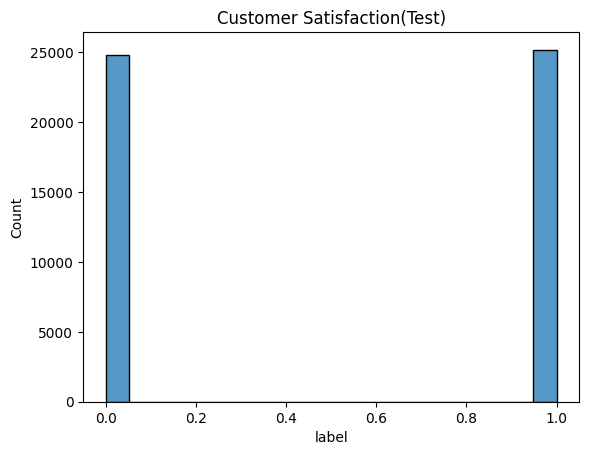

In [78]:
# Ïã§Ï†ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¥ÎûòÏä§ Í∑†Ìòï Î≥¥Í∏∞
sns.histplot(test_data["label"]).set(title="Customer Satisfaction(Test)")